# Capítulo 5: Metodología

En esta _notebook_ se encuentran algunos de los procesos descritos en el 
**Capítulo 5: Metodología. Secciones 1 a 4**

## Librerías y funciones necesarias

### Librerías de Python

In [1]:
# ==== Manipulación de datos y cómputo científico ==== #
import numpy as np 
import pandas as pd

# ==== Manejo de datos vectoriales ==== #
import geopandas as gpd 

# ==== Visualización de datos ==== #
import matplotlib as mpl 
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('font', family='serif')
import seaborn as sns

# ==== Google Earth Engine API y apoyos ==== #
import ee 
import eemont
import geemap

# ==== Visualización de mapas interactivos ==== #
import folium 

### Función de visualización

In [2]:
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

### Iniciar Python API (GEE)

In [3]:
# Iniciamos la GEE API
ee.Initialize()

## Obtención de datos

### Datos nacionales: CONAFOR

In [4]:
# Cargar datos
df_conafor = pd.read_excel('../datos/CONAFOR/Serie_historica_anual_incendios_(2017).xlsx')
# Eliminar columnas 'Unnamed: XX' 
arr_columnas_originales = df_conafor.columns.drop(list(df_conafor.filter(regex='Unnamed:')))
# Actualizar pandas.DataFrame
df_conafor = df_conafor[arr_columnas_originales]
df_conafor.head()

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,SEMAR,Gobierno del Estado,Municipios,Propietarios de Terrenos Forestales,Voluntarios,Federales,Total.1,Categoria,Tipo,Region
0,1,17-01-0001,21,53,53.70,102,49,18.80,3,Aguascalientes,...,0,0,9,0,6,0,15,Área de Protección de los Recursos Naturales Z...,Federal,Occidente
1,2,17-01-0002,21,49,44.00,102,7,26.40,10,Aguascalientes,...,0,0,8,0,5,0,13,NaN,NaN,Occidente
2,3,17-01-0003,21,52,3.25,102,23,30.00,1,Aguascalientes,...,0,10,10,3,13,0,39,NaN,NaN,Occidente
3,4,17-01-0004,21,43,17.12,102,21,52.45,1,Aguascalientes,...,0,4,4,4,5,0,20,NaN,NaN,Occidente
4,5,17-01-0005,21,59,14.80,102,12,34.54,11,Aguascalientes,...,0,3,10,0,6,0,26,NaN,NaN,Occidente


In [5]:
print(f"Se cuentan con {df_conafor.shape[0]} filas de información y {df_conafor.shape[1]} columnas/variables")
print("las cuales son las siguientes:")
print(df_conafor.columns.values)

Se cuentan con 8896 filas de información y 52 columnas/variables
las cuales son las siguientes:
['Número de Incendio' 'Clave del incendio' 'Grados' 'Minutos' 'Segundos'
 'Grados.1' 'Minutos.1' 'Segundos.1' 'Clave municipio' 'Estado'
 'Municipio' 'Predio' 'Causa' 'Causa especifica' 'Fecha Inicio'
 'Fecha Termino' 'Duración días' 'Tipo de incendio' 'ANP' 'ANP hectareas'
 'Tipo Vegetación' 'Tipo impacto' 'Arbolado Adulto' 'Renuevo' 'Arbustivo'
 'Herbáceo' 'Hojarasca' 'Suelo Organico' 'Total' 'Tamaño' 'Detección'
 'Llegada' 'Duración' 'Costos' 'Superficie Salvada' 'CO2 emitido'
 'CO2 Evitó emitir' 'CONAFOR' 'CONAFOR Servicios Externos'
 'CONAFOR Servicios Convenio de Gob. Del Edo y/o Asociaciones Regionales de Silvicultores'
 'CONANP' 'SEDENA' 'SEMAR' 'Gobierno del Estado' 'Municipios'
 'Propietarios de Terrenos Forestales' 'Voluntarios' 'Federales' 'Total.1'
 'Categoria' 'Tipo ' 'Region']


### Datos NASA: FIRMS

**Datos del archivo .csv**

In [6]:
df_firms_csv = pd.read_csv('../datos/NASA/DL_FIRE_M-C61_234937/fire_archive_M-C61_234937.csv')
df_firms_csv.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,25.5064,-103.2766,307.4,1.2,1.1,2001-01-01,1740,Terra,MODIS,65,6.03,291.8,5.8,D,0
1,16.5207,-94.9364,323.3,2.7,1.6,2001-01-01,1742,Terra,MODIS,80,6.03,293.5,69.6,D,0
2,16.5393,-94.9585,316.1,2.7,1.6,2001-01-01,1742,Terra,MODIS,73,6.03,293.9,38.5,D,0
3,16.5302,-94.9399,326.6,2.7,1.6,2001-01-01,1742,Terra,MODIS,83,6.03,294.0,85.1,D,0
4,16.5254,-94.9612,336.5,2.7,1.6,2001-01-01,1742,Terra,MODIS,89,6.03,293.9,140.0,D,0


In [7]:
print(f"Se cuentan con {df_firms_csv.shape[0]} filas de información y {df_firms_csv.shape[1]} columnas/variables")
print("las cuales son las siguientes:")
print(df_firms_csv.columns.values)

Se cuentan con 1335238 filas de información y 15 columnas/variables
las cuales son las siguientes:
['latitude' 'longitude' 'brightness' 'scan' 'track' 'acq_date' 'acq_time'
 'satellite' 'instrument' 'confidence' 'version' 'bright_t31' 'frp'
 'daynight' 'type']


**Datos archivo .json**

In [8]:
#df_firms_json = pd.read_json('../datos/NASA/DL_FIRE_M-C61_234938/fire_archive_M-C61_234938.json')
#df_firms_json.head()

In [9]:
#print(f"Se cuentan con {df_firms_json.shape[0]} filas de información y {df_firms_json.shape[1]} columnas/variables")
#print("las cuales son las siguientes:")
#print(df_firms_json.columns.values)

**Datos archivos .shp**

In [10]:
#df_firms_shp = gpd.read_file('../datos/NASA/DL_FIRE_M-C61_234932/fire_archive_M-C61_234932.shp')
#df_firms_shp

In [11]:
#print(f"Se cuentan con {df_firms_shp.shape[0]} filas de información y {df_firms_shp.shape[1]} columnas/variables")
#print("las cuales son las siguientes:")
#print(df_firms_shp.columns.values)

### Observaciones generales de los datos: Datos FIRMS 

In [12]:
# Se creará el `pandas.DataFrame` con el que se va a trabajar de ahora en adelante.
df_firms = df_firms_csv.copy()

### Imágenes satelitales: Google Earth Engine Python API

In [13]:
# Principales
ImgColl_Temp = ee.ImageCollection("MODIS/006/MOD11A1")
ImgColl_Climate = ee.ImageCollection("IDAHO_EPSCOR/TERRACLIMATE")
ImgColl_VegIndex = ee.ImageCollection("MODIS/006/MOD13Q1")
ImgColl_Fires = ee.ImageCollection("ESA/CCI/FireCCI/5_1")

## Filtro de datos

### Rango temporal de estudio

#### Datos CONAFOR

In [14]:
# Volver índice la columna 'Fecha Inicio' 
df_conafor = df_conafor.set_index('Fecha Inicio')

#### Datos FIRMS

In [15]:
# Cambiar de string a datetime64
df_firms['acq_date'] = pd.to_datetime(df_firms['acq_date'])
# Volverlo índice
df_firms = df_firms.set_index('acq_date')

#### Datos Google Earth Engine

> Trabajar con series de tiempo con objetos `pandas.DataFrame` y `geopandas.GeoDataFrame` son 
 similares pero para el caso de los objetos de Google Earth Engine no, se usan los objetos
 `ee.Filter` y para el caso de filtros de tiempo se usa 
 `ee.Filter.calendarRange(start, _end_, _field='day_of_year'_)`, donde:
>
> * **`start`** _(int)_: El inicio del campo de fecha o calendario
> * **`end`** _(int)_: El fin del campo de fecha o calendario. Por defecto la fecha es la misma que 
en `start`.
> * **`field`** _(str)_: El campo donde se aplica el filtro, existen varios: _'year'_, _'month'_,
_'hour'_,'minute'_, _'day_of_year'_, _'day_of_month'_ y _'day_of_week'_
>
> [Documentación](https://developers.google.com/earth-engine/apidocs/ee-filter-calendarrange)



In [16]:
# 20 años
Filter_Years = ee.Filter.calendarRange(start=2001, end=2020, field='year')

### Región de Interés

#### Datos CONAFOR

In [17]:
# Se crea una máscara 
mask_rdi = df_conafor['Estado'] == 'Yucatán'

# Se aplica la máscara
df_conafor = df_conafor[ mask_rdi ]

df_conafor.head()

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,SEMAR,Gobierno del Estado,Municipios,Propietarios de Terrenos Forestales,Voluntarios,Federales,Total.1,Categoria,Tipo,Region
Fecha Inicio,,,,,,,,,,,,,,,,,,,,,
2017-01-10,1,17-31-0001,19,46,59.8,89,18,8.3,79,Yucatán,...,0,0,9,0,0,0,18,NaN,NaN,Sureste
2017-01-22,2,17-31-0002,20,16,5.4,89,26,55.8,56,Yucatán,...,0,0,12,0,0,0,24,NaN,NaN,Sureste
2017-01-25,3,17-31-0003,20,58,19.3,89,53,8.3,87,Yucatán,...,0,0,9,0,0,0,21,NaN,NaN,Sureste
2017-01-26,4,17-31-0004,20,58,34.5,89,23,28.2,93,Yucatán,...,0,0,4,0,0,0,24,NaN,NaN,Sureste
2017-01-29,5,17-31-0005,21,27,46.4,87,44,55.7,96,Yucatán,...,0,0,0,0,85,0,155,Reserva de la Biosfera,Federal,Sureste


In [18]:
print(f'Se cuentan con {df_conafor.shape[0]} instancias registradas en el 2017 (CONAFOR)')

Se cuentan con 103 instancias registradas en el 2017 (CONAFOR)


#### Datos FIRMS

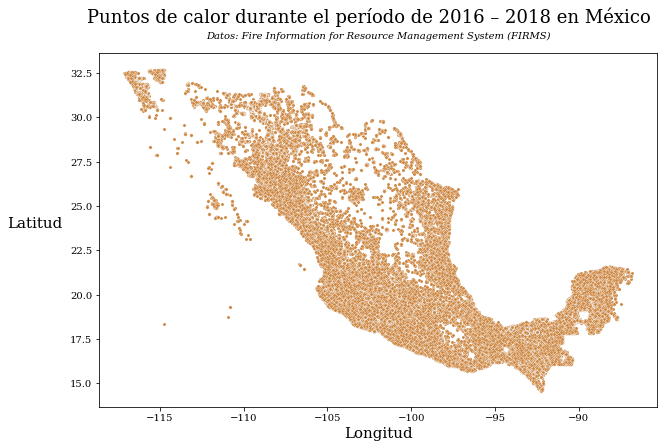

In [19]:
fig,ax = plt.subplots(figsize=(10,6.5),
#dpi=150
)

sns.scatterplot(data=df_firms.loc['2016':'2018'],
                x='longitude', y='latitude',
                ax=ax,
                color='peru', s=10
                )

# Etiquetas
title = f'Puntos de calor durante el período de 2016 – 2018 en México'
caption = f'Datos: Fire Information for Resource Management System (FIRMS)'

fig.suptitle(title, size=18)
ax.set_title(caption,size=10, pad=15, fontdict={'style':'italic'})

ax.set_xlabel('Longitud', size=15)
ax.set_ylabel('Latitud',rotation='horizontal',labelpad=35,size=15)
ax.tick_params(labelsize=10)


> Para poder "limitar" de manera espacial a nuestra región de interés, se siguen los siguientes pasos:
>
> 1. Si se esta trabajando con un `pandas.DataFrame` y en él hay información geoespacial (como valores de 
latitud y longitud), transformarlo a `geopandas.GeoDataFrame`. Este paso se puede omitir si ya se esta
trabajando con un `geopandas.GeoDataFrame`
> 2. Cargar un archivo **.shp** con la geometría de interés.
> 3. Se hace un _spatial join_ con GeoPandas (`geopandas.sjoin`)

In [20]:
# 1. Transformar a GeoDataFrame ambos DataFrames (df_firms y df_firms_3years)
# 1.1 Transformar a geometrias los atributos 'longitude' y 'latitude' 
geometry_firms = gpd.points_from_xy(df_firms['longitude'],df_firms['latitude'])

# 2. Crear GeoDataFrame's 
df_firms = gpd.GeoDataFrame(df_firms, geometry=geometry_firms, crs=4326)

# 3. Se realiza el spatial join
# 3.1 Se carga el archivo de la región de interés
yuc_info = gpd.read_file('../datos/31_yucatan/conjunto_de_datos/31ent.shp')
# 3.2 Cambiar la projección a 4326
yuc_info = yuc_info.to_crs(4326)
# 3.3 Se hace el spatial join
df_firms = gpd.sjoin(df_firms, yuc_info, how='inner')

/Users/isaacarroyov/miniconda3/envs/GEE/lib/python3.8/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


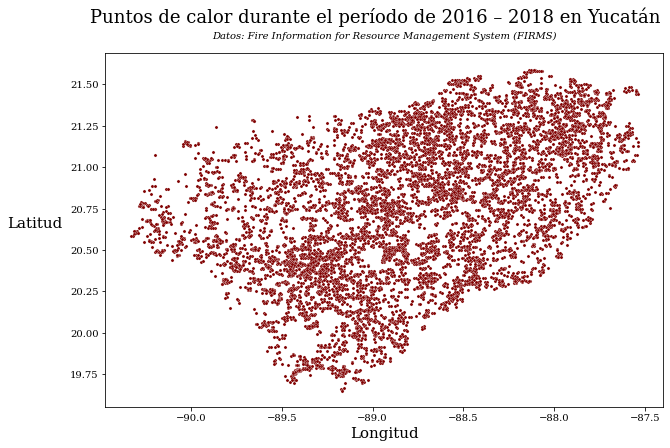

In [21]:
fig,ax = plt.subplots(figsize=(10,6.5),
#dpi=150
)

sns.scatterplot(data=df_firms.loc['2016':'2018'],
                x='longitude', y='latitude',
                ax=ax,
                color='maroon', s=10
                )

# Etiquetas
title = f'Puntos de calor durante el período de 2016 – 2018 en Yucatán'
caption = f'Datos: Fire Information for Resource Management System (FIRMS)'

fig.suptitle(title, size=18)
ax.set_title(caption,size=10, pad=15, fontdict={'style':'italic'})

ax.set_xlabel('Longitud', size=15)
ax.set_ylabel('Latitud',rotation='horizontal',labelpad=35,size=15)
ax.tick_params(labelsize=10)

#### Datos Google Earth Engine

> Para definir la región de interés dentro del ambiente de Google Earth Engine se tiene que usar el objeto
`ee.Geometry`. Para llevar el atributo de **'geometry'** de GeoPandas a `ee.Geometry` se siguen los 
siguientes pasos:
>
> 1. Hacer uso de la libreria **geemap** y su función `geemap.geopandas_to_ee` para llevar un 
`geopandas.GeoDataFrame` a `ee.FeatureCollection`.
> 2. Con el objeto `ee.FeatureCollection` se usa el método `.geometry` y de esa manera, se obtiene la 
un objeto `ee.Geometry`.

In [22]:
# 1.Convertir a ee.FeatureCollection()
fc = geemap.geopandas_to_ee(yuc_info)
# 2. Extraer geometría
roi = fc.geometry()
type(roi)

ee.geometry.Geometry

### Selección de variables

#### Datos CONAFOR

In [23]:
Lista_Variables_CONAFOR = ['Grados','Minutos', 'Segundos', 'Grados.1', 'Minutos.1', 'Segundos.1',
                          'Duración días',
                          'Clave municipio','Municipio', 'ANP',
                          'Tipo de incendio','Tipo impacto', 'Tipo Vegetación', 'Causa',
                          'Causa especifica', 'Superficie Salvada','Total'
                          ]

In [24]:
df_conafor = df_conafor[Lista_Variables_CONAFOR]

#### Datos Firms

In [25]:
Lista_Variables_FIRMS = ['acq_time', 'confidence', 'brightness','bright_t31',
'frp', 'daynight','type', 'geometry']

In [26]:
df_firms = df_firms[Lista_Variables_FIRMS]

#### Datos Google Earth Engine

In [27]:
# Temperatura
ImgColl_Temp = ImgColl_Temp.select(['LST_Day_1km'])

# Humedad
ImgColl_Humedad = ImgColl_Climate.select(['soil'])

# Sequía
ImgColl_Sequia = ImgColl_Climate.select(['pdsi'])

# Índices de vegetación
ImgColl_NDVI = ImgColl_VegIndex.select(['NDVI'])
ImgColl_EVI = ImgColl_VegIndex.select(['EVI'])

# Incendios
ImgColl_Fires = ImgColl_Fires.select(['BurnDate'])

## Limpieza, transformación y procesamiento de datos

> Cada tipo de conjunto de datos requiere una tratamiento diferente por lo que en esta sección 
se realizan estos tratamientos por separado

### Datos CONAFOR

#### Tipos de datos

> Previo a realizar algun cambio es importante revisar que los atributos tengan los tipos de datos adecuados

In [28]:
df_conafor.dtypes

Grados                 object
Minutos                 int64
Segundos              float64
Grados.1                int64
Minutos.1               int64
Segundos.1            float64
Duración días          object
Clave municipio         int64
Municipio              object
ANP                    object
Tipo de incendio       object
Tipo impacto           object
Tipo Vegetación        object
Causa                  object
Causa especifica       object
Superficie Salvada    float64
Total                 float64
dtype: object

> Se puede ver que el atributo **'Grados'** es objeto, cuando se necesita que sea numérico

In [29]:
df_conafor['Grados'] = df_conafor['Grados'].apply(lambda x: float(x))

#### Conversión de coordenadas GMS (Grados, Minutoss, Segundos) a Decimales

> Los datos de la CONAFOR tienen una peculiaridad interesante y es la manera en la que estan georeferenciados las
instancias, usan el sitema de **Grados, Minutos y Segundos (GMS)** o _Degree, Minutes, Seconds_ (DMS).
>
> Para ello es necesario crear una función que haga la conversión de unidades.

In [30]:
def dms_to_decimal(series_deg, series_min, series_sec, south_or_west = True):
    """
    La función hace la conversión de _Degrees Minutes Seconds_ a Decimal.

    Input: **`pandas.Series`** -> `series_deg`, `series_min` y `series_sec`
        Si **`north_or_west`** es `True`, significa que se estan lidiando con 
        puntos situados en el norte o en el oeste (poniente). De lo contrario es 
        `False`

    Returns: `pandas.Series`
    """
    Series_Decimal = series_deg.astype(float) + series_min.astype(float)/60 + series_sec.astype(float)/(60*60)
    if south_or_west:
        Series_Decimal = -1 * Series_Decimal
    else:
        pass
    return Series_Decimal

In [31]:
df_conafor['Latitud'] = dms_to_decimal(df_conafor['Grados'], df_conafor['Minutos'],df_conafor['Segundos'],
                                       south_or_west=False) # Porque Yucatan esta el norte del Ecuador
df_conafor['Longitud'] = dms_to_decimal(df_conafor['Grados.1'], df_conafor['Minutos.1'],df_conafor['Segundos.1'],
                                       south_or_west=True) # Porque Yucatan esta el oeste del Meridiano de Greenwich

> Se pueden eliminar las columnas de Grados, Minutos y Segundos (de ambos tipos)

In [32]:
df_conafor =  df_conafor.drop(columns=['Grados', 'Minutos', 'Segundos', 'Grados.1', 'Minutos.1', 'Segundos.1'])

> Y además podemos mover transformar de `pandas.DataFrame` a `geopandas.GeoDataFrame`

In [33]:
# 1. Transformar a geometrias los atributos 'Longitud' y 'Latitud' 
geometry_conafor = gpd.points_from_xy(df_conafor['Longitud'], df_conafor['Latitud'])

# 2. Crear GeoDataFrame
df_conafor = gpd.GeoDataFrame(df_conafor, geometry=geometry_conafor, crs=4326)

# 3. Eliminar las columnas de 'Longitud' y 'Latitud' 
df_conafor = df_conafor.drop(columns=['Longitud','Latitud'])

df_conafor.head()

/Users/isaacarroyov/miniconda3/envs/GEE/lib/python3.8/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,Duración días,Clave municipio,Municipio,ANP,Tipo de incendio,Tipo impacto,Tipo Vegetación,Causa,Causa especifica,Superficie Salvada,Total,geometry
Fecha Inicio,,,,,,,,,,,,
2017-01-10,2 a 3 Días,79,TEKAX,0,Mixto,Impacto Moderado,Selva mediana subcaducifolia - SMS,Cazadores,Ninguna / No aplica,45.726,3.0,POINT (-89.30231 19.78328)
2017-01-22,2 a 3 Días,56,Oxkutzcab,0,Superficial,Impacto Mínimo,Selva baja caducifolia - SBC,Quema de basureros,Ninguna / No aplica,45.726,3.0,POINT (-89.44883 20.26817)
2017-01-25,2 a 3 Días,87,Tetiz,0,Mixto,Impacto Moderado,Selva baja caducifolia - SBC,Otras actividades productivas,Industria,533.470,35.0,POINT (-89.88564 20.97203)
2017-01-26,4 a 7 Días,93,Tixkokob,0,Superficial,Impacto Mínimo,Selva baja caducifolia - SBC,Cazadores,Ninguna / No aplica,335.324,22.0,POINT (-89.39117 20.97625)
2017-01-29,4 a 7 Días,96,Tizimín,Ría Lagartos,Superficial,Impacto Mínimo,Selva baja caducifolia - SBC,Cazadores,Ninguna / No aplica,3246.546,213.0,POINT (-87.74881 21.46289)


#### Valores nulos/vacíos

In [34]:
df_conafor.isnull().sum()

Duración días         0
Clave municipio       0
Municipio             0
ANP                   0
Tipo de incendio      0
Tipo impacto          0
Tipo Vegetación       0
Causa                 0
Causa especifica      0
Superficie Salvada    0
Total                 0
geometry              0
dtype: int64

#### Valores únicos en cada atributo

In [35]:
for i in df_conafor.columns.values[:-1]:
    print(" ======= {} ======".format(i))
    print(df_conafor[i].unique())
    print("\n")

 ======= Duración días ======
['2 a 3 Días' '4 a 7 Días' 'Mayor de 7 Días' '1 Día']


 ======= Clave municipio ======
[ 79  56  87  93  96   7   1  28  11  85  51  38  80  62  98  61   8  52
  40 104  19 102]


 ======= Municipio ======
['TEKAX' 'Oxkutzcab' 'Tetiz' 'Tixkokob' 'Tizimín' 'Tekax' 'Cacalchén'
 'Abalá' 'Dzilam de Bravo' 'Celestún' 'Temozón' 'Mocochá' 'Hunucmá'
 'Tekit' 'Sacalum' 'Tzucacab' 'Río Lagartos' 'Calotmul' 'Motul' 'Izamal'
 'Yaxcabá' 'Chemax' 'Valladolid']


 ======= ANP ======
[0 'Ría Lagartos' 'Ría Celest·n']


 ======= Tipo de incendio ======
['Mixto' 'Superficial']


 ======= Tipo impacto ======
['Impacto Moderado' 'Impacto Mínimo' 'Impacto Severo']


 ======= Tipo Vegetación ======
['Selva mediana subcaducifolia - SMS' 'Selva baja caducifolia - SBC'
 'Selva mediana caducifolia - SMC' 'Petén - PT' 'Tular - VT'
 'Vegetación Halófila (Hidrófila) - VHH']


 ======= Causa ======
['Cazadores' 'Quema de basureros' 'Otras actividades productivas'
 'Actividades Agropec

> Lo que se destaca de esta rápida exploración es:

> * La categoría **'0'** en el atributo **'ANP'**
> * La instancia cuyo valor es **Ría Celest·n** en el atributo **'ANP'**
> * La instancia **TEKAX** en el atributo **Municipio**

In [36]:
# Cambiar instancias '0' por 'No ANP'
df_conafor['ANP'] = df_conafor['ANP'].astype(str).str.replace('0','No ANP')
# Cambiar instancia 'Ría Celest·n' por 'Ría Celestún'
df_conafor['ANP'] = df_conafor['ANP'].str.replace('Ría Celest·n','Ría Celestún')
# Cambiar instancia TEKAX por Tekax
df_conafor['Municipio'] = df_conafor['Municipio'].str.replace('TEKAX','Tekax')

### Datos FIRMS

#### Tipos de datos

> Previo a realizar algun cambio es importante revisar que los atributos tengan los tipos de datos adecuados

In [37]:
df_firms.dtypes

acq_time         int64
confidence       int64
brightness     float64
bright_t31     float64
frp            float64
daynight        object
type             int64
geometry      geometry
dtype: object

#### Valores nulos/vacíos

In [38]:
df_firms.isnull().sum()

acq_time      0
confidence    0
brightness    0
bright_t31    0
frp           0
daynight      0
type          0
geometry      0
dtype: int64

#### Valores únicos 

In [39]:
df_firms['daynight'].unique()

array(['D', 'N'], dtype=object)

### Datos Google Earth Engine

> Una ventaja del uso de los datos proporcionados por Google Earth Engine es que están (en su gran mayoría), listos
para ser usados y visualizados. Solamente es cuestión de fijarse en la información proporcionada por la plataforma
para saber si hace falta algún tipo de escalamiento.

#### Temperatura: [MOD11A1.006 Terra Land Surface Temperature and Emissivity Daily Global 1km](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD11A1)

> Los cambios a las unidades que hay que hacer al `ee.ImageCollection` de las temperaturas es que estas están escaladas
y dadas en Kelvin. 
>
> Para aplicar una operación o función a todas las imágenes de una colección se usa el método `map`

In [40]:
# Se define la función del cambio
def kelvin_to_celsius(image):
    Scale = image.multiply(0.02)
    toCelsius = Scale.subtract(273.15)
    image_Celsius = toCelsius.copyProperties(image, ['system:time_start'])
    return image_Celsius

# Se aplica a todos los elementos
ImgColl_Temp = ImgColl_Temp.map(kelvin_to_celsius)

In [41]:
# Filtro por fecha
ImgColl_Temp = ImgColl_Temp.filter(Filter_Years)

#### Humedad  del  suelo e Índice de Gravedad de la Sequíade Palmer: [TerraClimate: Monthly Climate and Climatic Water Balance for Global Terrestrial Surfaces, University of Idaho](https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE)

> Para ambas bandas (`'soil'` y `'psdi'`) solo hay que aplicar un escalamiento de 0.01

In [42]:
def scale_soil(image):
    scale_image = image.multiply(0.1).copyProperties(image,['system:time_start'])
    return scale_image

def scale_psdi(image):
    scale_image = image.multiply(0.01).copyProperties(image,['system:time_start'])
    return scale_image

ImgColl_Humedad = ImgColl_Humedad.map(scale_soil)
ImgColl_Sequia = ImgColl_Sequia.map(scale_psdi)

In [43]:
# Filtro por fecha
ImgColl_Humedad = ImgColl_Humedad.filter(Filter_Years)
ImgColl_Sequia = ImgColl_Sequia.filter(Filter_Years)

#### NDVI y EVI: [MOD13Q1.006 Terra Vegetation Indices 16-Day Global 250m](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD13Q1)

> Para este conjunto de datos  hay que realizar un escalamiento y filtar por los 
rangos de tiempo

In [44]:
def scale_vegIndex_modis(image):
    scale_image = image.multiply(0.0001).copyProperties(image,['system:time_start'])
    return scale_image

ImgColl_NDVI = ImgColl_NDVI.map(scale_vegIndex_modis)
ImgColl_EVI = ImgColl_EVI.map(scale_vegIndex_modis)

ImgColl_NDVI_20years = ImgColl_NDVI.filter(Filter_Years)
ImgColl_EVI_20years = ImgColl_EVI.filter(Filter_Years)

#### Registro de incendios forestales: [FireCCI51: MODIS Fire_cci Burned Area Pixel Product, Version 5.1](https://developers.google.com/earth-engine/datasets/catalog/ESA_CCI_FireCCI_5_1)

In [45]:
ImgColl_Fires = ImgColl_Fires.filter(Filter_Years)

## Siguientes pasos: Datos para Capítulo 6

### Datos CONAFOR

> Contando con los datos preprocesados se guardarán en un archivo que luego podrán ser usados 
para la exploración y visualización de los datos. Al contener atributos de geometría se 
guardará como un archivo **GeoJSON**

In [46]:
#df_conafor.to_file('../datos/CONAFOR/datos_conafor_2017.geojson', driver='GeoJSON')

### Datos FIRMS

> Contando con los datos preprocesados se guardarán en un archivo que luego podrán ser usados 
para la exploración y visualización de los datos. Al contener atributos de geometría se 
guardará como un archivo **GeoJSON**

In [47]:
#df_firms.to_file('../datos/NASA/datos_firms_2001_2020.geojson', driver='GeoJSON')

### Datos Google Earth Engine

> Para el caso de los datos de Google Earth Engine se sigue el mismo procedimiento que se realizó durante esta 
_notebook_